**Zip file path**

In [37]:
path = "/content/drive/MyDrive/Ml with Python/intel_images.zip"

**Extracting the zip file**

In [38]:
from zipfile import ZipFile

with ZipFile(path) as f:
  f.extractall("./data")
  print("Data extracted")
     

Data extracted


**Importing the required modules**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from PIL import Image
import numpy as np

**Loading the saved model and taking the classes and also summary of the model**

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Ml with Python/intel.h5")
classes = [
    "buildings",
    "forest",
    "glacier",
    "mountain",
    "sea",
    "street"
]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 9)         252       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 9)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 18)        1476      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 18)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 36)          5868      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 36)         0

**Write a function for prediction of model**

In [49]:
def pred(prediction):
  image = Image.open(prediction)
  image = image.resize((32,32))
  test = tf.reshape(tf.constant(np.array(image)/255), (-1,32,32,3))
  preds = model.predict(test, verbose=False)[0]*100
  preds = tf.math.round(preds)
  confidence = tf.reduce_max(preds)
  index = int(tf.where(preds == confidence)[0][0])
  pred = classes[index]
  return "The type of intel is "+pred.title() +" and it's confidence is ", int(confidence), "%"

**Prediction of Forest**

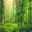

In [39]:
img = Image.open("/content/drive/MyDrive/Ml with Python/Forest1.jpg")
img = img.resize((32,32))
img

In [50]:
pred("/content/drive/MyDrive/Ml with Python/Forest1.jpg")

("The type of intel is Forest and it's confidence is ", 100, '%')

**Prediction of Glacier**

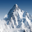

In [40]:
img = Image.open("/content/drive/MyDrive/Ml with Python/Mountain1.jpg")
img = img.resize((32,32))
img

In [ ]:
pred("/content/drive/MyDrive/Ml with Python/Mountain1.jpg")

("The type of intel is Glacier and it's confidence is ", 80, '%')

**Prediction of Mountain**

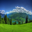

In [41]:
img = Image.open("/content/drive/MyDrive/Ml with Python/Mountain2.jpg")
img = img.resize((32,32))
img

In [42]:
pred("/content/drive/MyDrive/Ml with Python/Mountain2.jpg")

("The type of intel is Mountain and it's confidence is ", 100, '%')

**Prediction of Sea**

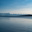

In [43]:
img = Image.open("/content/drive/MyDrive/Ml with Python/See1.jpg")
img = img.resize((32,32))
img

In [44]:
pred("/content/drive/MyDrive/Ml with Python/See1.jpg")

("The type of intel is Sea and it's confidence is ", 100, '%')